# COVID-19 Status (Colombia)

### Importar librerias

In [1]:
from datetime import datetime

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sn

### Importar dataset - Datos abiertos COVID-19 (Colombia)

In [2]:
data = pd.DataFrame.from_dict(requests.get('https://www.datos.gov.co/resource/gt2j-8ykr.json?$limit=999999999').json())

### Normalización y ajuste de datos

In [3]:
data.columns = ['Id de caso', 'Fecha de diagnóstico', 'Ciudad de ubicación', 'Departamento', 'Estado', 'Edad', 'Sexo', 'Tipo', 'País de procedencia']
for column in ['Ciudad de ubicación', 'Estado', 'Sexo', 'Tipo', 'País de procedencia']:
    data[column] = data[column].str.capitalize()
data['Fecha de diagnóstico'] = data['Fecha de diagnóstico'].apply(lambda x: pd.to_datetime(x, dayfirst=True))
data['Clasificación de edad'] = pd.cut(x=data['Edad'].apply(float), bins=[-np.inf,10,20,30,40,50,60,70,80,90,np.inf], include_lowest=True, labels=['0 - 10', '10 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', '70 - 80', '80 - 90', '90 - 100+'])
data = data[['Id de caso', 'Fecha de diagnóstico', 'Ciudad de ubicación', 'Departamento', 'Estado', 'Edad', 'Clasificación de edad', 'Sexo', 'Tipo', 'País de procedencia']]
data = data.set_index('Id de caso')

date = datetime.today().strftime('%Y-%m-%d')
data.to_csv(f'./Datasets/COVID-19 Status (Colombia) [{date}].csv', index = True)

def numbers(div):
    for i in range(0, len(ax.patches)//div, 1):
        height = 0
        for j in range(0, div, 1):
            height += ax.patches[j*(len(ax.patches)//div)+i].get_height()
        ax.text(ax.patches[i].get_x()+(ax.patches[i].get_width()/20), height+3, int(height), fontsize=11, color='dimgrey', rotation=45)

### Habilitar Matplotlib

In [4]:
%matplotlib inline

## Análisis Dataset - COVID-19 (Colombia)

### - Datos COVID-19 (Colombia)

In [5]:
data

,Fecha de diagnóstico,Ciudad de ubicación,Departamento,Estado,Edad,Clasificación de edad,Sexo,Tipo,País de procedencia
Id de caso,,,,,,,,,
1,2020-03-06,Bogota,BOGOTÁ D.C.,Recuperado,19,10 - 20,F,Importado,Italia
2,2020-03-09,Buga,VALLE DEL CAUCA,Recuperado,34,30 - 40,M,Importado,España
3,2020-03-09,Medellin,ANTIOQUIA,Recuperado,50,40 - 50,F,Importado,España
4,2020-03-11,Medellin,ANTIOQUIA,Recuperado,55,50 - 60,M,Relacionado,Colombia
5,2020-03-11,Medellin,ANTIOQUIA,Recuperado,25,20 - 30,M,Relacionado,Colombia
...,...,...,...,...,...,...,...,...,...
2848,2020-04-13,Funza,CUNDINAMARCA,Casa,14,10 - 20,M,En estudio,Colombia
2849,2020-04-13,Espinal,TOLIMA,Casa,40,30 - 40,F,En estudio,Colombia
2850,2020-04-13,Calarca,QUINDÍO,Casa,27,20 - 30,F,En estudio,Colombia


### - Casos confirmados VS Departamento (Sexo)

In [6]:
data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0)

Sexo,F,M
Departamento,,
ANTIOQUIA,143.0,129.0
ATLÁNTICO,12.0,12.0
BARRANQUILLA D.E.,34.0,34.0
BOGOTÁ D.C.,601.0,604.0
BOLÍVAR,3.0,6.0
BOYACÁ,16.0,15.0
BUENAVENTURA D.E.,2.0,5.0
CALDAS,23.0,13.0
CARTAGENA D.T. Y C,61.0,64.0


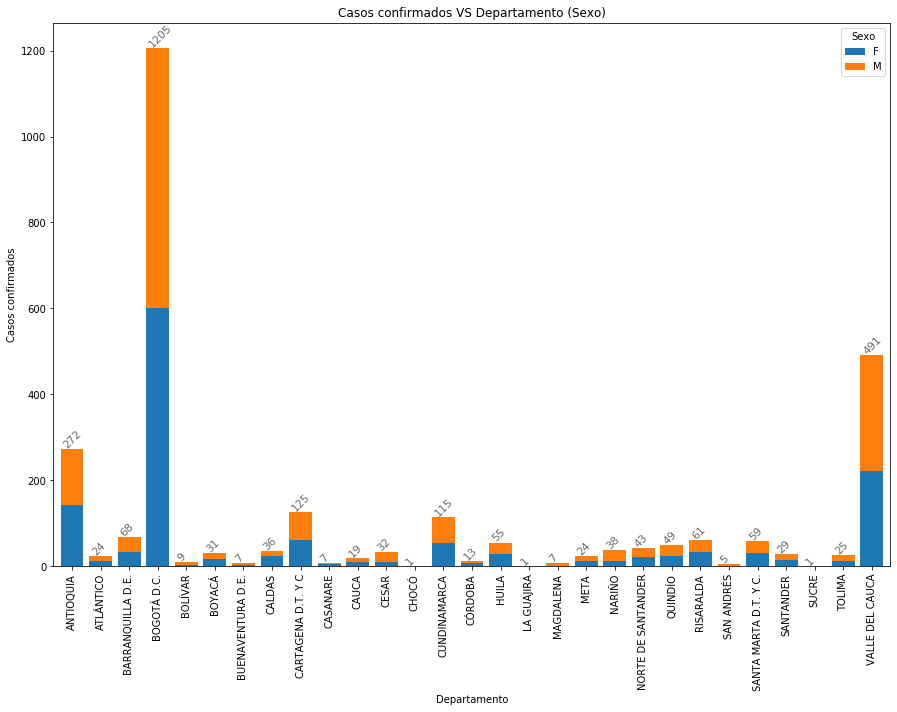

In [7]:
ax = data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Sexo)'))
ax.set_ylabel('Casos confirmados')
div =len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Departamento (Clasificación de edad)

In [8]:
data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad,0 - 10,10 - 20,20 - 30,30 - 40,40 - 50,50 - 60,60 - 70,70 - 80,80 - 90,90 - 100+
Departamento,,,,,,,,,,
ANTIOQUIA,3,9,65,58,38,61,23,8,6,1
ATLÁNTICO,3,2,2,4,6,2,5,0,0,0
BARRANQUILLA D.E.,2,7,18,12,10,10,7,2,0,0
BOGOTÁ D.C.,29,52,233,276,205,180,131,68,25,6
BOLÍVAR,0,0,2,3,1,1,1,1,0,0
BOYACÁ,1,4,4,6,4,4,4,3,1,0
BUENAVENTURA D.E.,0,0,3,1,0,0,1,2,0,0
CALDAS,2,2,10,5,3,7,4,0,2,1
CARTAGENA D.T. Y C,2,8,26,24,20,25,10,7,3,0


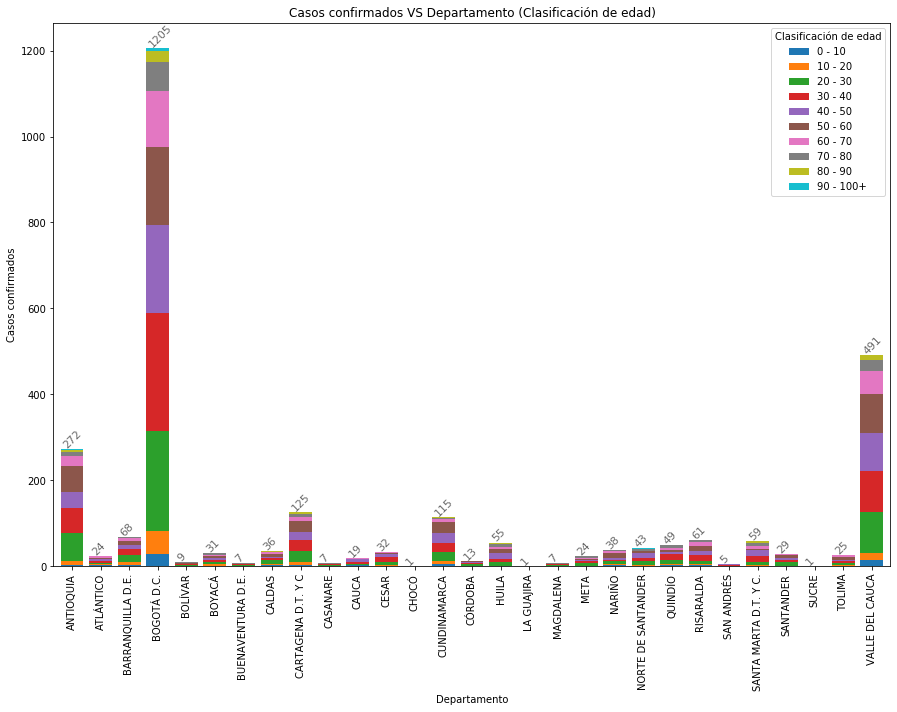

In [9]:
ax = data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Departamento (Estado)

In [10]:
data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0)

Estado,Casa,Fallecido,Hospital,Hospital uci,Recuperado
Departamento,,,,,
ANTIOQUIA,213.0,1.0,8.0,9.0,41.0
ATLÁNTICO,21.0,2.0,0.0,0.0,1.0
BARRANQUILLA D.E.,43.0,2.0,7.0,2.0,14.0
BOGOTÁ D.C.,882.0,48.0,125.0,47.0,103.0
BOLÍVAR,7.0,1.0,1.0,0.0,0.0
BOYACÁ,26.0,1.0,2.0,0.0,2.0
BUENAVENTURA D.E.,2.0,0.0,3.0,2.0,0.0
CALDAS,23.0,2.0,0.0,0.0,11.0
CARTAGENA D.T. Y C,85.0,9.0,16.0,2.0,13.0


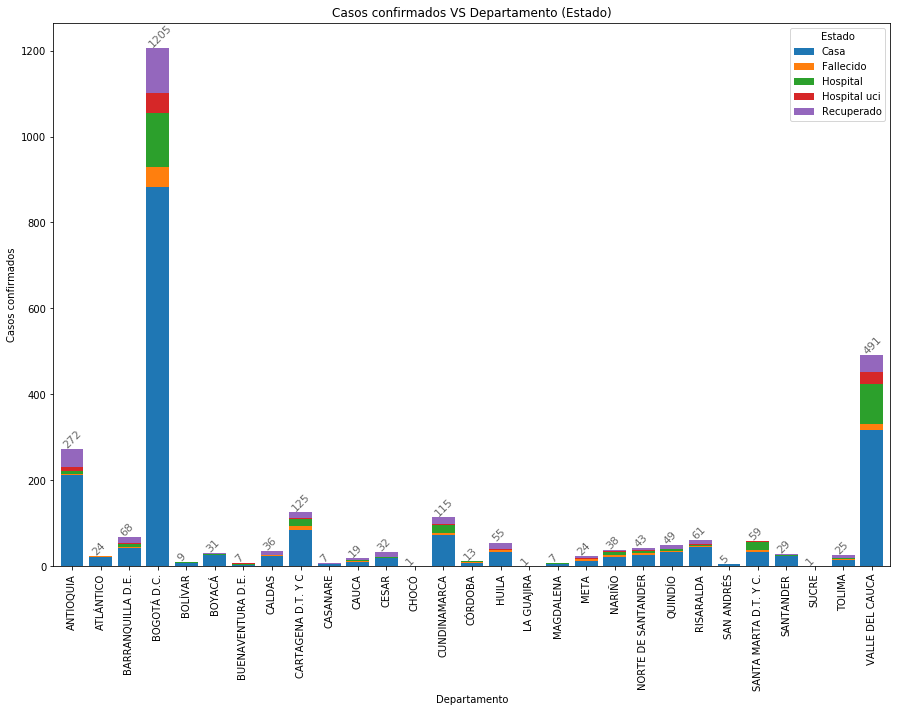

In [11]:
ax = data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Estado)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Sexo)

In [12]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0)

Sexo,F,M
Fecha de diagnóstico,,
2020-03-06,1.0,0.0
2020-03-09,1.0,1.0
2020-03-11,4.0,2.0
2020-03-12,4.0,0.0
2020-03-13,2.0,1.0
2020-03-14,4.0,4.0
2020-03-15,9.0,12.0
2020-03-16,5.0,7.0
2020-03-17,7.0,11.0


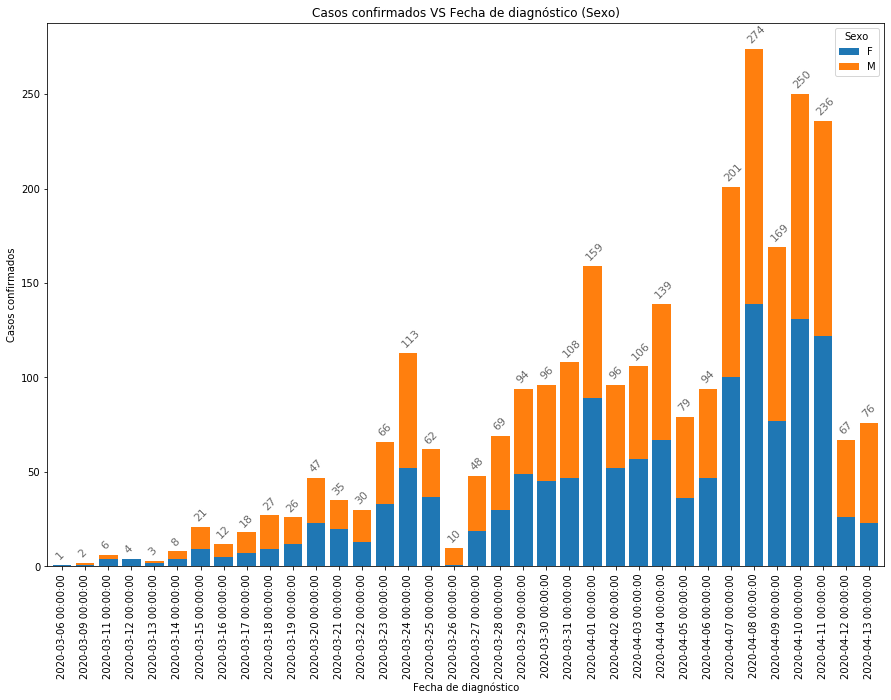

In [13]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados')
div =len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)

In [14]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad,0 - 10,10 - 20,20 - 30,30 - 40,40 - 50,50 - 60,60 - 70,70 - 80,80 - 90,90 - 100+
Fecha de diagnóstico,,,,,,,,,,
2020-03-06,0,1,0,0,0,0,0,0,0,0
2020-03-09,0,0,0,1,1,0,0,0,0,0
2020-03-11,0,0,4,0,0,1,0,0,1,0
2020-03-12,0,0,0,1,1,0,1,1,0,0
2020-03-13,0,0,1,0,1,0,1,0,0,0
2020-03-14,0,1,3,1,0,2,0,1,0,0
2020-03-15,0,0,9,0,3,5,1,3,0,0
2020-03-16,0,0,2,4,3,1,2,0,0,0
2020-03-17,0,2,7,4,1,2,1,1,0,0


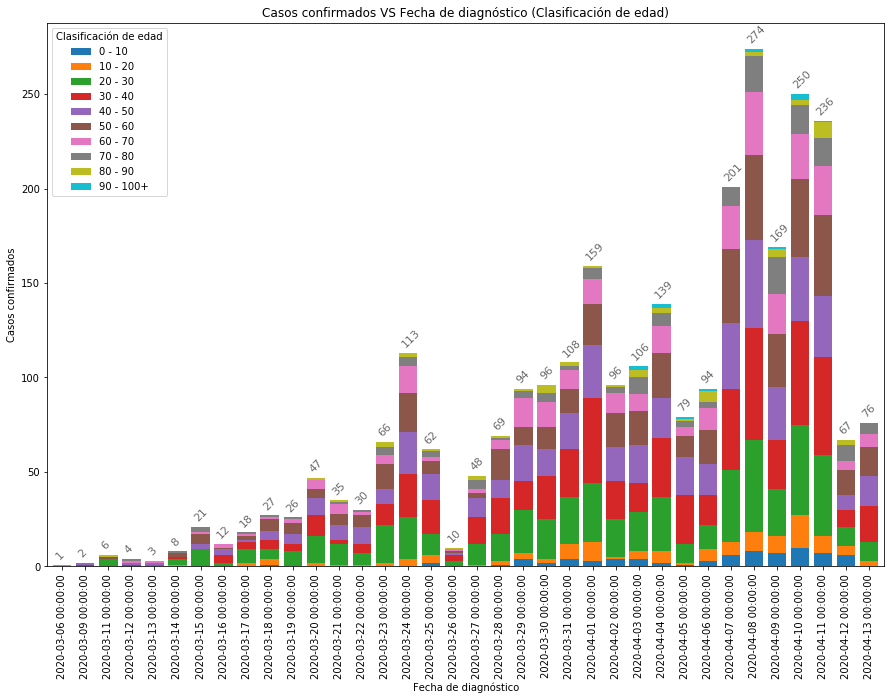

In [15]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Estado)

In [16]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0)

Estado,Casa,Fallecido,Hospital,Hospital uci,Recuperado
Fecha de diagnóstico,,,,,
2020-03-06,0.0,0.0,0.0,0.0,1.0
2020-03-09,0.0,0.0,0.0,0.0,2.0
2020-03-11,0.0,0.0,0.0,0.0,6.0
2020-03-12,0.0,0.0,0.0,0.0,4.0
2020-03-13,0.0,0.0,0.0,0.0,3.0
2020-03-14,0.0,0.0,0.0,0.0,8.0
2020-03-15,4.0,0.0,0.0,0.0,17.0
2020-03-16,0.0,0.0,0.0,0.0,12.0
2020-03-17,7.0,0.0,0.0,0.0,11.0


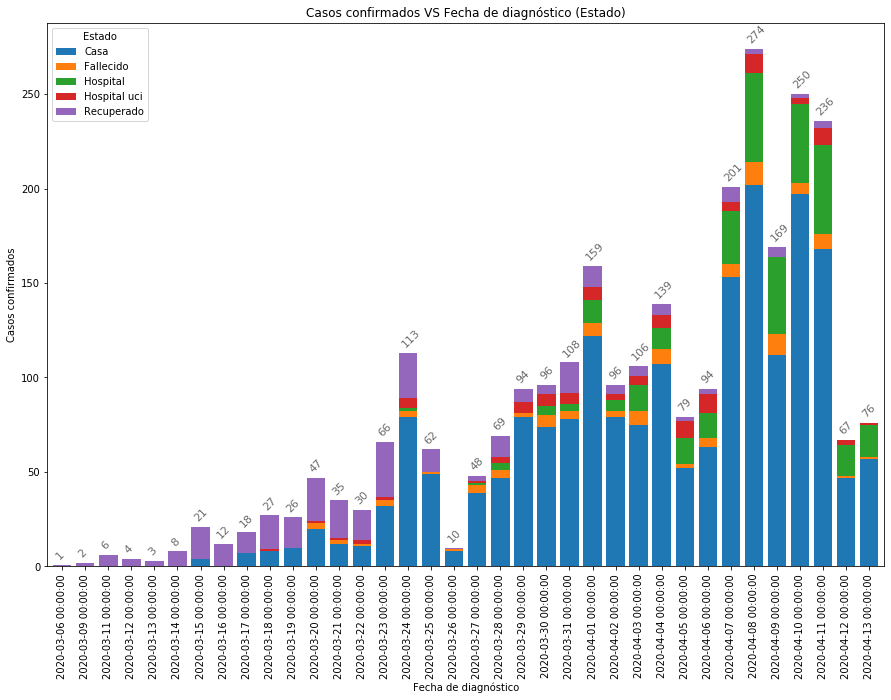

In [17]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers(div)

### - Casos confirmados VS Estado (Sexo)

In [18]:
data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0)

Sexo,F,M
Estado,,
Casa,1033,958
Fallecido,42,70
Hospital,115,209
Hospital uci,36,70
Recuperado,167,152


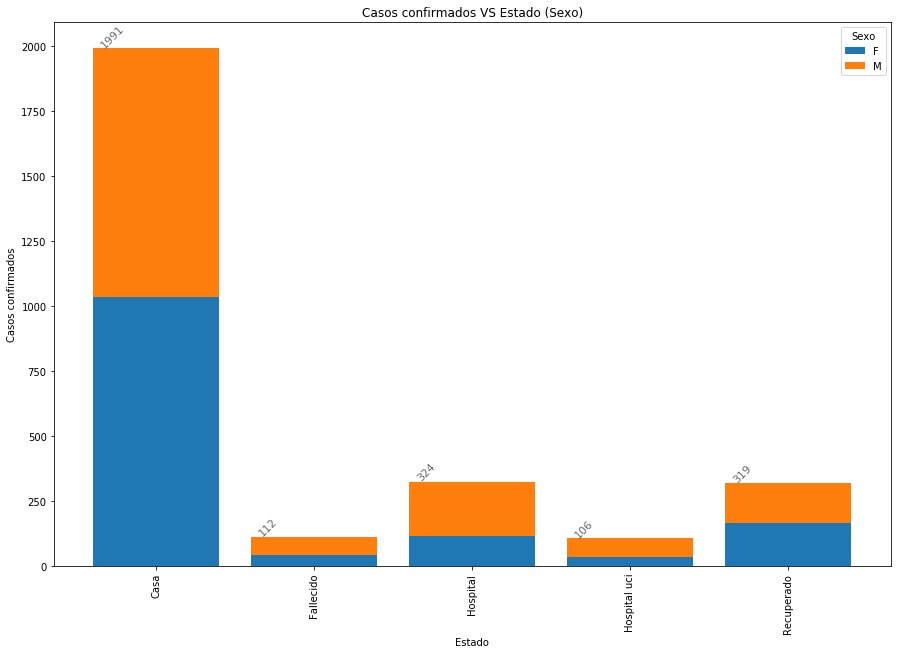

In [19]:
ax = data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Sexo)'))
ax.set_ylabel('Casos confirmados')
div =len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Estado (Clasificación de edad)

In [20]:
data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad,0 - 10,10 - 20,20 - 30,30 - 40,40 - 50,50 - 60,60 - 70,70 - 80,80 - 90,90 - 100+
Estado,,,,,,,,,,
Casa,67,106,436,494,332,316,153,59,24,4
Fallecido,1,1,2,7,9,18,22,31,15,6
Hospital,4,8,28,40,63,64,62,41,11,3
Hospital uci,0,0,7,8,15,23,29,20,4,0
Recuperado,3,10,94,56,67,50,25,12,2,0


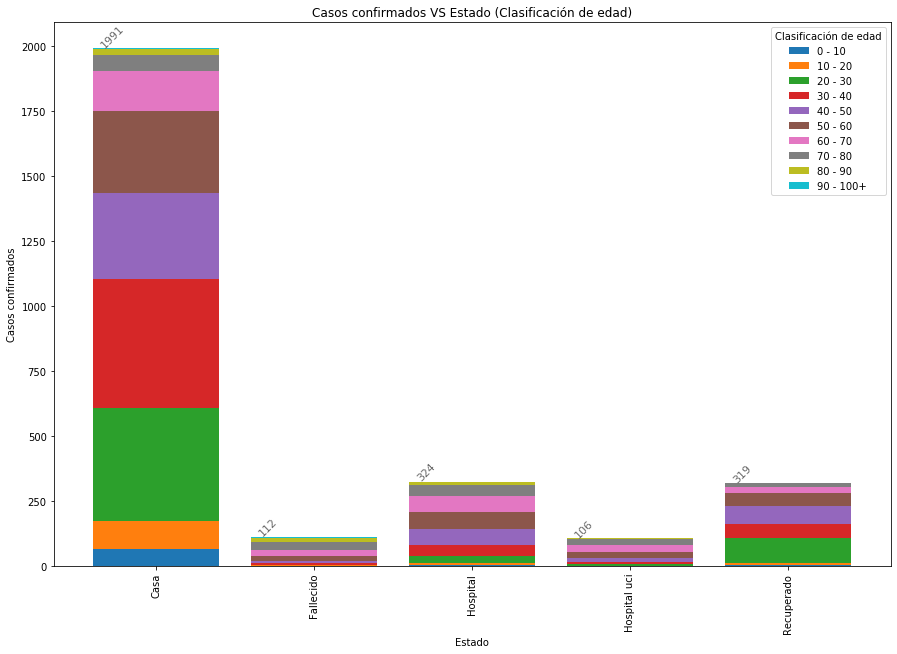

In [21]:
ax = data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Tipo de contagio (Sexo)

In [22]:
data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0)

Sexo,F,M
Tipo,,
En estudio,570,618
Importado,362,397
Relacionado,461,444


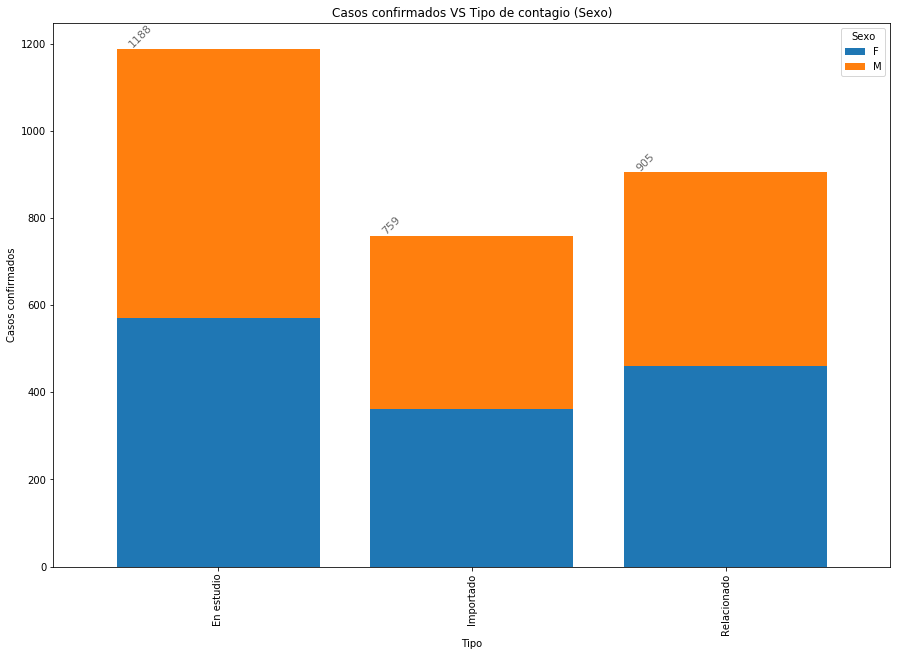

In [23]:
ax = data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo de contagio (Sexo)'))
ax.set_ylabel('Casos confirmados')
div =len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Tipo (Clasificación de edad)

In [24]:
data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad,0 - 10,10 - 20,20 - 30,30 - 40,40 - 50,50 - 60,60 - 70,70 - 80,80 - 90,90 - 100+
Tipo,,,,,,,,,,
En estudio,36,51,196,235,199,204,131,94,31,11
Importado,4,25,188,169,129,125,82,28,9,0
Relacionado,35,49,183,201,158,142,78,41,16,2


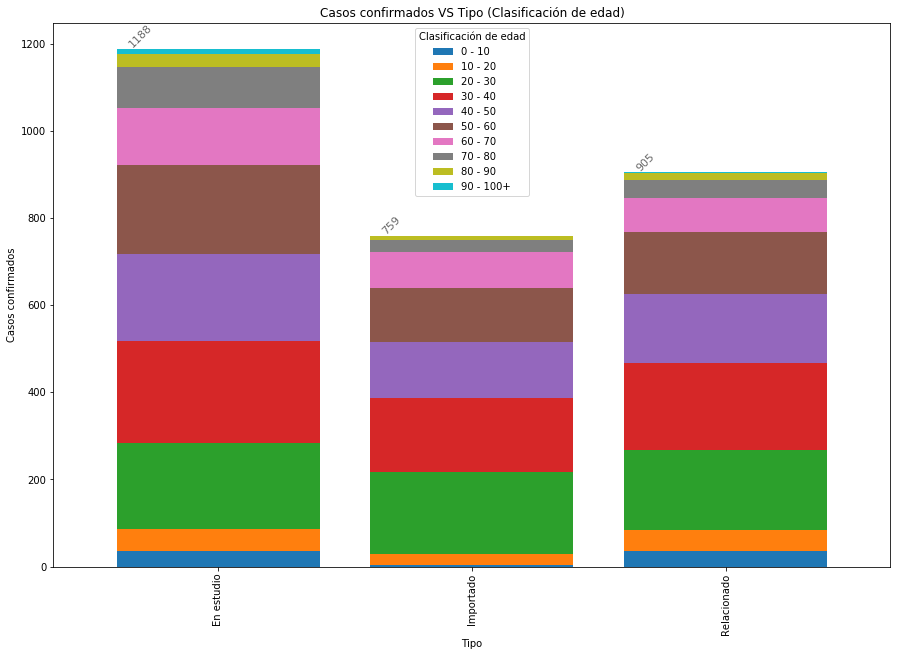

In [25]:
ax = data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Clasificación de edad (Sexo)

In [26]:
data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0)

Sexo,F,M
Clasificación de edad,,
0 - 10,36,39
10 - 20,57,68
20 - 30,301,266
30 - 40,299,306
40 - 50,243,243
50 - 60,207,264
60 - 70,140,151
70 - 80,72,91
80 - 90,28,28


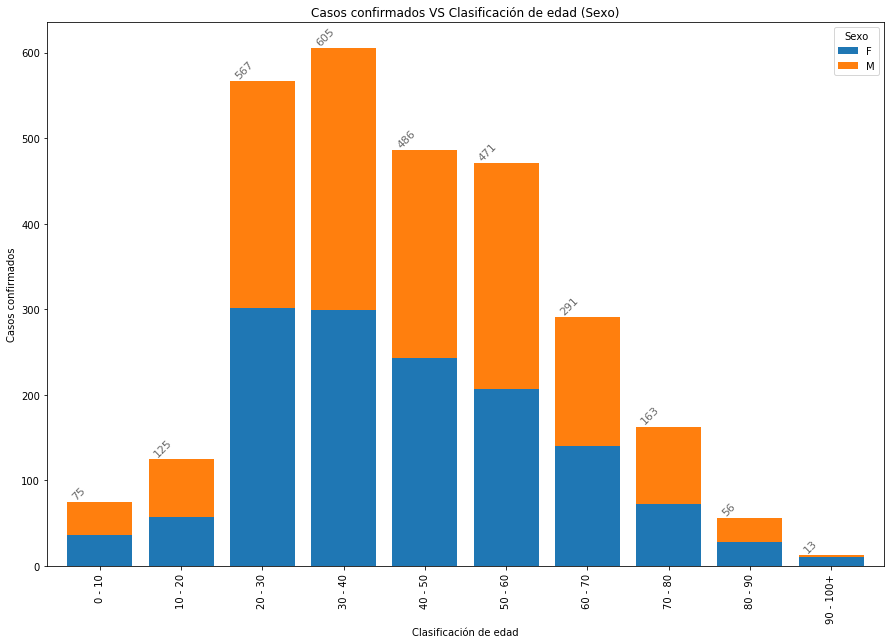

In [27]:
ax = data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Sexo)'))
ax.set_ylabel('Casos confirmados')
div =len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Clasificación de edad (Estado)

In [28]:
data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0)

Estado,Casa,Fallecido,Hospital,Hospital uci,Recuperado
Clasificación de edad,,,,,
0 - 10,67,1,4,0,3
10 - 20,106,1,8,0,10
20 - 30,436,2,28,7,94
30 - 40,494,7,40,8,56
40 - 50,332,9,63,15,67
50 - 60,316,18,64,23,50
60 - 70,153,22,62,29,25
70 - 80,59,31,41,20,12
80 - 90,24,15,11,4,2


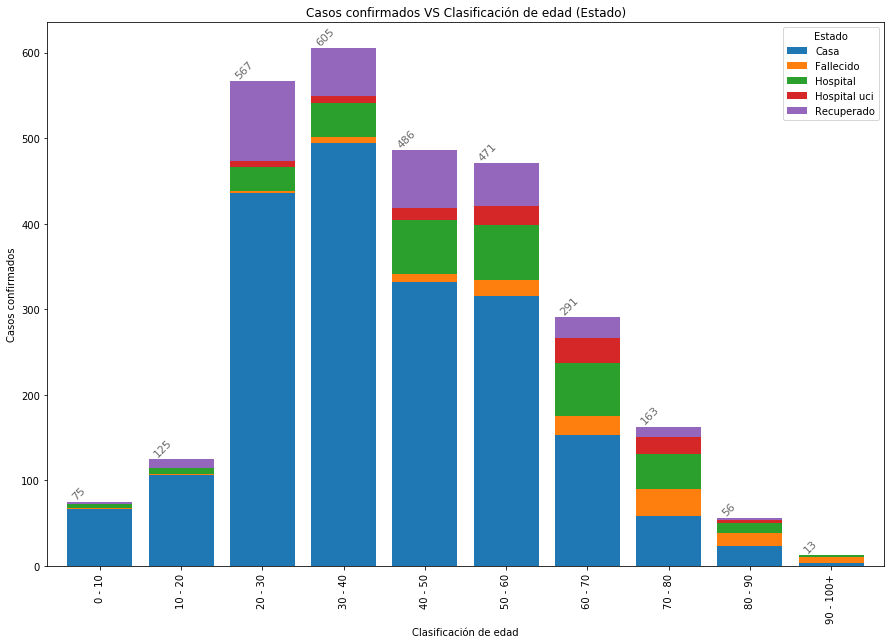

In [29]:
ax = data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Estado)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)

In [30]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum().fillna(0)

Sexo,F,M
Fecha de diagnóstico,,
2020-03-06,1.0,0.0
2020-03-09,2.0,1.0
2020-03-11,6.0,3.0
2020-03-12,10.0,3.0
2020-03-13,12.0,4.0
2020-03-14,16.0,8.0
2020-03-15,25.0,20.0
2020-03-16,30.0,27.0
2020-03-17,37.0,38.0


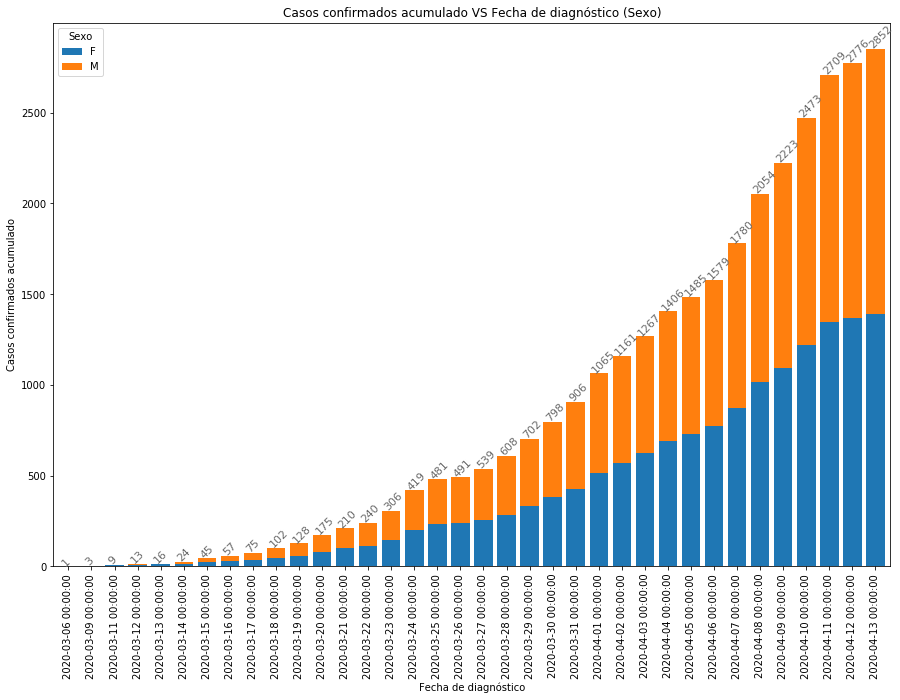

In [31]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados acumulado')
div =len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Clasificación de edad)

In [32]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum().fillna(0)

Clasificación de edad,0 - 10,10 - 20,20 - 30,30 - 40,40 - 50,50 - 60,60 - 70,70 - 80,80 - 90,90 - 100+
Fecha de diagnóstico,,,,,,,,,,
2020-03-06,0,1,0,0,0,0,0,0,0,0
2020-03-09,0,1,0,1,1,0,0,0,0,0
2020-03-11,0,1,4,1,1,1,0,0,1,0
2020-03-12,0,1,4,2,2,1,1,1,1,0
2020-03-13,0,1,5,2,3,1,2,1,1,0
2020-03-14,0,2,8,3,3,3,2,2,1,0
2020-03-15,0,2,17,3,6,8,3,5,1,0
2020-03-16,0,2,19,7,9,9,5,5,1,0
2020-03-17,0,4,26,11,10,11,6,6,1,0


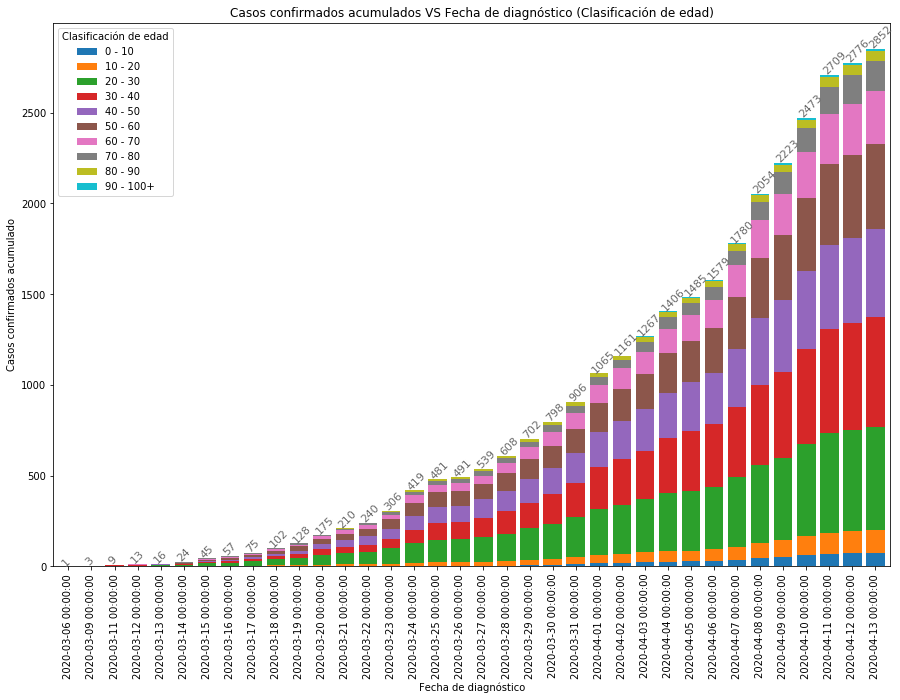

In [33]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Estado)

In [34]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum()

Estado,Casa,Fallecido,Hospital,Hospital uci,Recuperado
Fecha de diagnóstico,,,,,
2020-03-06,0.0,0.0,0.0,0.0,1.0
2020-03-09,0.0,0.0,0.0,0.0,3.0
2020-03-11,0.0,0.0,0.0,0.0,9.0
2020-03-12,0.0,0.0,0.0,0.0,13.0
2020-03-13,0.0,0.0,0.0,0.0,16.0
2020-03-14,0.0,0.0,0.0,0.0,24.0
2020-03-15,4.0,0.0,0.0,0.0,41.0
2020-03-16,4.0,0.0,0.0,0.0,53.0
2020-03-17,11.0,0.0,0.0,0.0,64.0


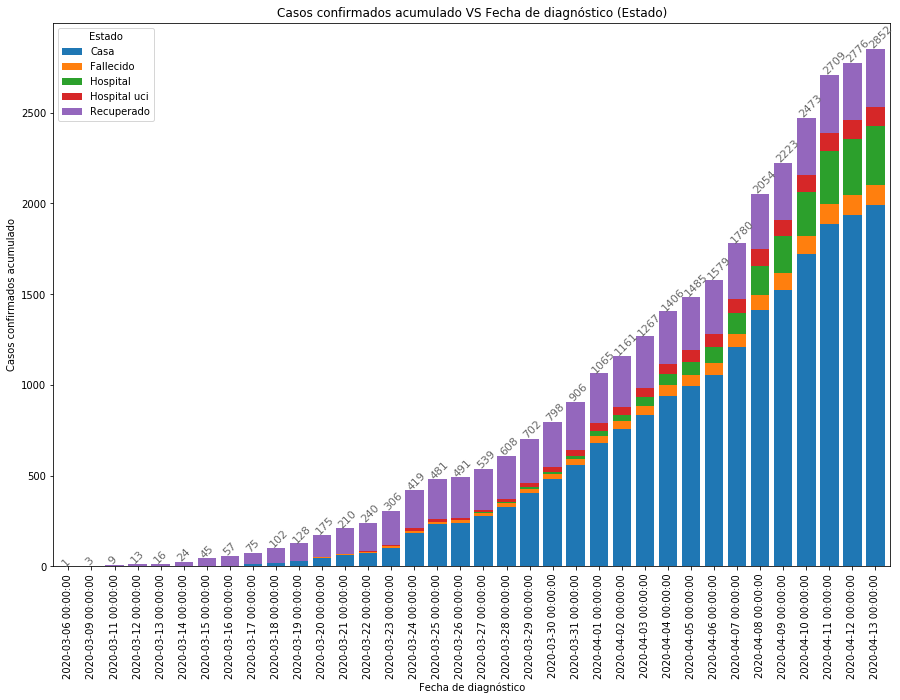

In [35]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Estado'].unique())
numbers(div)

## #StayHome #QuedateEnCasa

### Made with ♥ by <a href='https://github.com/jlcadavid'>@jlcadavid</a>